# Python libraries: rasterio
We test the Python package [rasterio](https://rasterio.readthedocs.io/en/stable/) to perform several operations on raster files. 

In [41]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from shapely.geometry import Point, LineString, Polygon
import rasterio
import warnings
warnings.filterwarnings('ignore')
print("NumPy version: %s"%np.__version__)
print("Matplotlib version: %s"%mpl.__version__)
print("Rasterio version: %s"%rasterio.__version__)

NumPy version: 1.25.2
Matplotlib version: 3.8.0
Rasterio version: 1.3.9


## Raster metadata
A GeoTiff file comes with some metadata about its size, bands data type, coordinate reference system and projection, bounding box

In [3]:
raster_path = 'data/raster/italy/IT_60_20140731_R1C1_sharp.tif'
raster_ds = rasterio.open(raster_path)
num_bands = raster_ds.count
cols = raster_ds.width
rows = raster_ds.height
print('Number of bands: {:d}\nCols: {:d}\nRows: {:d}'.format(num_bands, cols, rows))

Number of bands: 3
Cols: 1554
Rows: 1126


In [5]:
[(i, dtype) for i, dtype in zip(raster_ds.indexes, raster_ds.dtypes)]

[(1, 'uint16'), (2, 'uint16'), (3, 'uint16')]

In [13]:
print('Coordinate reference system: {:}'.format(raster_ds.crs))

Coordinate reference system: EPSG:3035


In [34]:
origin_x = raster_ds.transform.xoff
origin_y = raster_ds.transform.yoff
print('Raster origin\nx: {:.2f}\ny: {:.2f}'.format(origin_x, origin_y))

Raster origin
x: 4258393.33
y: 2488957.68


In [37]:
resolution_x = raster_ds.transform[0]
resolution_y = raster_ds.transform[4]
print('Pixel resolution x: {:.2f}, y: {:.2f}'.format(resolution_x, resolution_y ))

Pixel resolution x: 0.50, y: -0.50


In [40]:
bbox_nw = raster_ds.bounds.left

4258393.328696856

A point in a raster dataset can be represented as a pair of coordinates (horizontal, vertical). The units of the pair depends on the coordinates reference system. We create the NW vertex of the raster bounding box with its left (horizontal) and top (vertical) edges, and the SE vertex with the right (horizontal) and bottom (vertical) edges. 

In [46]:
bbox_nw = Point(raster_ds.bounds.left, raster_ds.bounds.top)
bbox_se = Point(raster_ds.bounds.right, raster_ds.bounds.bottom)
print('Bounding box\nNW x: {:.2f}, y: {:.2f}\nSE x: {:.2f}, y: {:.2f}'.format(bbox_nw.x, bbox_nw.y, bbox_se.x, bbox_se.y))

Bounding box
NW x: 4258393.33, y: 2488957.68
SE x: 4259170.33, y: 2488394.68


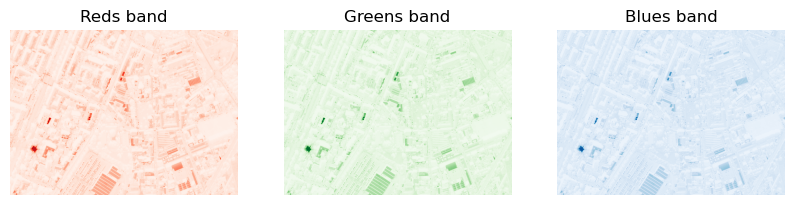

In [70]:
channels = ['Reds', 'Greens', 'Blues']
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,10))
for i in range(0, 3):
    ax[i].set_title('%s band'%channels[i])
    ax[i].set_axis_off()
    ax[i].imshow(raster_ds.read(i + 1), cmap=channels[i])

A pixel value can be in a range that depends on the dynamic range (aka bit depth) of the image.  

In [62]:
max_pixel_value = 0
for i in range(0, 3):
    if raster_ds.read(i + 1).max() > max_pixel_value:
        max_pixel_value = raster_ds.read(i + 1).max()
max_pixel_value

5258

## Raster visualization
The Python Imaging Library ([PIL](https://pillow.readthedocs.io/en/latest/index.html)) does not support pixel values greater than 8 bits (i.e. from 0 to 255). Since a satellite image often has a bit depth of 10 to 12 bits we have to reduce the bit depth or normalize the data for visualization. 

In [53]:
def normalize(array):
    array_norm = (array - array.min()) / (array.max() - array.min())
    return array_norm

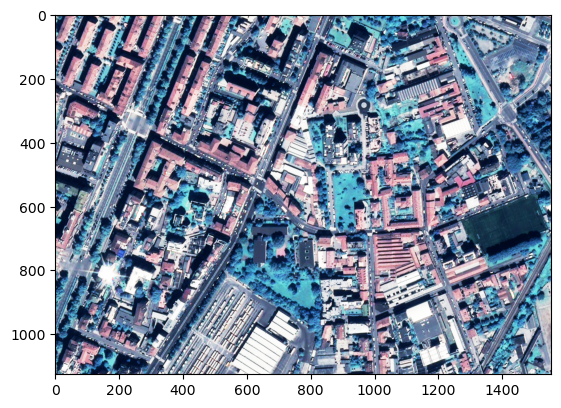

In [55]:
from skimage import io
from skimage import exposure
subset_img = io.imread(raster_path)
subset_norm = exposure.equalize_hist(normalize(subset_img))
plt.imshow(subset_norm)

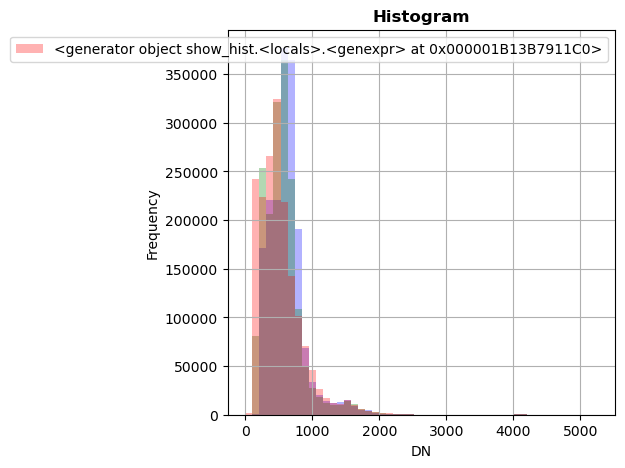

In [75]:
from rasterio.plot import show_hist
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
show_hist(raster_ds, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title='Histogram', ax=ax)